# Plynty Bureau of Labor Statistics Consumer Expenditure Analysis

[BLS Comsumer Expenditure Survey](https://www.bls.gov/cex/home.htm)

[Interview Data Dictionary](https://www.bls.gov/cex/2015/csxintvwdata.pdf)

[Diary Data Dictionary](https://www.bls.gov/cex/2015/csxdiarydata.pdf)

### Where to download the BLS CE PUMD
- The zip files download automatically
- To download the Stub files open the links then right click and choose "Save As..."

[2015 interview zip file](https://www.bls.gov/cex/pumd/data/comma/intrvw15.zip)

[2015 diary zip file](https://www.bls.gov/cex/pumd/data/comma/diary15.zip)

[2015 IntStub file](https://www.bls.gov/cex/pumd/2014/csxintstub.txt)

[2015 IStub file](https://www.bls.gov/cex/pumd/2014/csxistub.txt)

[2015 DStub file](https://www.bls.gov/cex/pumd/2014/csxdstub.txt)

### This Scripts Goals for Plynty
- Create an easy to use analysis script for the BLS CE PUMD 
- Create a csv files that has average percentages spent on plynty categories for certain income classes
- Create incomeclasses that are stastically significant

##### Importing Libraries 

In [1]:
import pandas as pd
# import numpy as np
import os
import subprocess
import math
import matplotlib.pyplot as plt
from plyntywidgets import *
from blsFunctions import *

### Setting Parameters
- year: the last two number associated with the year of the data
    for example for data from 2015: year = "15"
- minAge: the low bound (inclusive) of the age range you wish to subset by
- maxAge: the high bound (inclusive) of the age range you wish to subset by
- incomeBrackets: array of numbers that you wish to create the new income classes
    the bracketing works as follows (1,2], (2,3], (3,4]
- filesToRead: the strings of the abbreviations associated with the files you wish to read
    options are: "all", "diary", "interview", "dtbd", "expd", "fmld", "memd", "fmli", "itbi", "memi", "mtbi", "ntaxi"

In [2]:
year = "15"
# hard coding ages
# minAge = 55
# maxAge = 64
# filesToRead = ["fmli", "mtbi"]
incomeBrackets = [-math.inf,11000,20000,30000,43000,55000,69000,80000,100000,120000,150000,250000,300000,math.inf]

# Display Cool widgets
display(ageRange, readFiles)

### Using the widgets to set values

In [3]:
# setting age range using the cool widget
minAge = ageRange.value[0]
maxAge = ageRange.value[1]
# setting the filesToRead using the cool widget
filesToRead = readFiles.value

### Setting Directory locations and FileNames on your Local Machine

In [4]:
# directory in which the diary and interview folders are held is located
diaryDir = "/Users/adyke/Vizuri/CE_PUMD/diary15/"
interviewDir = "/Users/adyke/Vizuri/CE_PUMD/intrvw15/"

# Directory where stubfiles are located
pathToStubFileDir = "/Users/adyke/Vizuri/Stubfiles/"
rScriptStubfilePathAndName = "/Users/adyke/Vizuri/BLS_Python_Analysis/creatingStubCsvs.R"

# Filenames of the Stubfiles
IStubFileName = "IStub2015.txt"
DStubFileName = "DStub2015.txt"
IntStubFileName = "IntStub2015.txt"

# name of interview dir within the interview dir
insideIntrvwDirName = "intrvw"

# name of the directory where you want the output percentages csv
outputDir = "/Users/adyke/Vizuri/outputFiles/"

### Reading in the files specified by FilesToRead

In [5]:
if(len(filesToRead)==0):
	print("The files to read variable is empty.")

# looping through each file to read
for file in filesToRead:
	if file == "dtbd" or file == "all" or file == "diary":
		dtbd = readFileSet("dtbd", diaryDir)
	if file == "expd" or file == "all" or file == "diary":
		expd = readFileSet("expd", diaryDir)
	if file == "fmld" or file == "all" or file == "diary":
		fmld = readFileSet("fmld", diaryDir)
	if file == "memd" or file == "all" or file == "diary":
		memd = readFileSet("memd", diaryDir)
	if file == "fmli" or file == "all" or file == "interview":
		fmli = readFileSet("fmli", interviewDir+insideIntrvwDirName+year+"/")
	if file == "itbi" or file == "all" or file == "interview":
		itbi = readFileSet("itbi", interviewDir+insideIntrvwDirName+year+"/")
	if file == "itii" or file == "all" or file == "interview":
		itii = readFileSet("itii", interviewDir+insideIntrvwDirName+year+"/")
	if file == "memi" or file == "all" or file == "interview":
		memi = readFileSet("memi", interviewDir+insideIntrvwDirName+year+"/")
	if file == "mtbi" or file == "all" or file == "interview":
		mtbi = readFileSet("mtbi", interviewDir+insideIntrvwDirName+year+"/")
	if file == "ntaxi" or file == "all" or file == "interview":
		ntaxi = readFileSet("ntaxi", interviewDir+insideIntrvwDirName+year+"/")
	# does not read form the expn or para subdirectories


### Using R to convert the Stub files into csv files

In [6]:
if os.path.isfile(pathToStubFileDir+"DStub.csv") and os.path.isfile(pathToStubFileDir+"IStub.csv") and os.path.isfile(pathToStubFileDir+"IntStub.csv"):
    print("Stubfiles Exist")
else:
    # converting the stub files via R 
    subprocess.call("Rscript "+rScriptStubfilePathAndName+" "+pathToStubFileDir+" "+IStubFileName+" "+DStubFileName+" "+IntStubFileName, shell=True)
    print("Stubfile Csvs created in "+pathToStubFileDir)

Stubfiles Exist


### Reading and Cleaning the stubfile CSVs into pandas dataframes

In [7]:
# reading in the stubfiles
DStub = pd.read_csv(pathToStubFileDir+"DStub.csv")
IStub = pd.read_csv(pathToStubFileDir+"IStub.csv")
IntStub = pd.read_csv(pathToStubFileDir+"IntStub.csv")

# removing the index from the stufile
DStub = DStub.drop(DStub.columns[0], axis=1)
IStub = IStub.drop(IStub.columns[0], axis=1)
IntStub = IntStub.drop(IntStub.columns[0], axis=1)

# replacing * with 0 in the level columns
DStub.loc[DStub.level == "*", 'level'] = 0
IStub.loc[IStub.level == "*", 'level'] = 0
IntStub.loc[IntStub.level == "*", 'level'] = 0

### Creating the UCC roll ups for Plynty

In [8]:
# creating UCC rollups for the interview files for plynty categories
iTotalExp = categoricalUCCRollUp(IStub,["TOTALE"])
iFoodAtHome = categoricalUCCRollUp(IStub, ["FOODHO", "ALCHOM"])
iFoodAway = categoricalUCCRollUp(IStub, ["FOODAW", "ALCAWA"])
iHousing = categoricalUCCRollUp(IStub, ["HOUSIN"], ignoreUCCs = categoricalUCCRollUp(IStub, ["UTILS"]))
iUtilites = categoricalUCCRollUp(IStub, ["UTILS"])
iClothingAndBeauty = categoricalUCCRollUp(IStub, ["APPARE","PERSCA"])
iTransportation = categoricalUCCRollUp(IStub, ["TRANS"])
iHealthcare = categoricalUCCRollUp(IStub, ["HEALTH"])
iEntertainment = categoricalUCCRollUp(IStub, ["ENTRTA","READIN"])
iMiscellaneous = categoricalUCCRollUp(IStub, ["MISC","TOBACC"])
iCharitableAndFamilyGiving = categoricalUCCRollUp(IStub, ["CASHCO"])
iInsurance = categoricalUCCRollUp(IStub, ["LIFEIN"])
iEducation = categoricalUCCRollUp(IStub, ["EDUCAT"])
iHousingPrinciple = categoricalUCCRollUp(IStub,["MRTPRI"])

### Cleaning and reseting the indecies of the MTBI file

In [9]:
# restting the index
# mtbi.reset_index()

# Change mtbi UCC column to string
# needed for the loop through rollups
mtbi.UCC = mtbi.UCC.astype(str)

### Adding and Rolling up the MTBI Categories into mtbiRolledUp

In [10]:
rollupNames = ["iTotalExp","iFoodAtHome","iFoodAway","iHousing","iUtilites","iClothingAndBeauty","iTransportation","iHealthcare","iEntertainment","iMiscellaneous","iCharitableAndFamilyGiving","iInsurance","iEducation","iHousingPrinciple"]
rollups = [iTotalExp,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple]

mtbiRolledUp = rollUpDataframe(mtbi, rollupNames, rollups, negativeColumns=["iHousingPrinciple"], multiple=4)

mtbiTrimmed = mtbiRolledUp.loc[: , ['NEWID','iTotalExp','iFoodAtHome','iFoodAway','iHousing','iUtilites','iClothingAndBeauty','iTransportation','iHealthcare','iEntertainment','iMiscellaneous','iCharitableAndFamilyGiving','iInsurance','iEducation','iHousingPrinciple']]

### Creating the Sum for all expenditure category columns for each NEWID
Testing removing the rows that have 0 response for columns that we think are important

In [11]:
# adding up all columns for each new id
iExpensesByNewID = mtbiTrimmed.groupby(['NEWID'],as_index=False).sum()
# removing rows with zero values in key categories
nonZeroColumns = ['iFoodAtHome','iFoodAway','iHousing','iUtilites']
for column in nonZeroColumns:
    iExpensesByNewID = iExpensesByNewID[iExpensesByNewID[column] != 0]
iExpensesByNewID['iHousing'] = iExpensesByNewID['iHousing']+iExpensesByNewID['iHousingPrinciple']

### Subestting FMLI for age and recoding the incomebrackets

In [12]:
# subsetting for the age bracket
fmliAge = subsetDataframe(dataframe=fmli, columnName="AGE_REF", minValue=minAge, maxValue=maxAge)
fmliAge = fmliAge.reset_index()

# recoding the income brackets
fmliRecoded = binColumn(dataframe=fmliAge, toBinColumnName="FINCBTXM", binValues=incomeBrackets, binnedColumnName="INCLASS", labels=range(1,len(incomeBrackets)))

### Adding the Income class colum to the ExpensesByNewID dataframe

In [13]:
# combining the fmli and iExpensesByNewID
inclassExpenses = pd.merge(left=fmliRecoded[['NEWID','INCLASS']],right=iExpensesByNewID, on=['NEWID'])

### Averaging the expenditures based on incomebrackets

In [14]:
# getting mean for all columns with the same income class besides newId and creating new dataframe
inclassAverages = round(inclassExpenses.ix[: ,inclassExpenses.columns != 'NEWID'].groupby(['INCLASS'],as_index=False).mean(),2)

# inclassAverages


### Median of the expenditures based on income brackets

In [15]:
inclassMedians = round(inclassExpenses.ix[:,inclassExpenses.columns != 'NEWID'].groupby(['INCLASS'],as_index=False).median(),2)
# inclassMedians

### Converting the Average expenditures for income classes into percentages of expenditures

In [16]:
# creating new dataframe for the percentages that only includes the plynty categories
percentages = inclassAverages.loc[:,rollupNames[1:]]
for column in rollupNames[1:]:
    percentages[column] = inclassAverages[column]/inclassAverages.iTotalExp
    
percentages

,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
0,0.131886,0.066590,0.290843,0.101500,0.026746,0.168671,0.106250,0.057058,0.021890,0.046355,0.002804,0.001114,0.021706
1,0.139287,0.058106,0.306757,0.113760,0.027570,0.167590,0.089041,0.053154,0.016914,0.033781,0.004308,0.015016,0.025284
2,0.139203,0.062098,0.276772,0.103323,0.025925,0.182569,0.108871,0.062340,0.026186,0.026102,0.004636,0.006261,0.024287
3,0.129805,0.064351,0.279114,0.094477,0.029280,0.175372,0.112486,0.063223,0.027639,0.043683,0.005953,0.002715,0.028098
4,0.126034,0.063207,0.272018,0.097737,0.026748,0.212470,0.106827,0.058538,0.017832,0.038724,0.006247,0.005881,0.032262
5,0.116602,0.059898,0.286347,0.094286,0.031239,0.194396,0.119756,0.051148,0.023404,0.038399,0.007093,0.018212,0.040780
6,0.115605,0.059821,0.293193,0.085030,0.030774,0.201864,0.121270,0.057424,0.013061,0.037266,0.009924,0.015833,0.041066
7,0.109720,0.060312,0.307076,0.086876,0.027628,0.210327,0.107145,0.061942,0.016551,0.046634,0.010414,0.010902,0.055529
8,0.107397,0.066736,0.313717,0.085637,0.030373,0.198535,0.106032,0.064497,0.017613,0.045534,0.010484,0.014313,0.060869
9,0.100842,0.068627,0.345528,0.079308,0.033725,0.185834,0.091287,0.064782,0.015257,0.048297,0.007269,0.024916,0.065672


### Converting the Median expenditures for income classes into percentages of expenditures

In [17]:
# creating new dataframe for the percentages that only includes the plynty categories
percentagesM = inclassMedians.loc[:,rollupNames[1:]]
for row in range(len(percentagesM)):
    # creating the row total for "row"
    rowTotal = percentagesM.loc[row,percentagesM.columns != 'iTotalExp'].sum()
    # replacing each element with the percent
    for column in rollupNames[1:]:
        percentagesM.loc[row,column] = percentagesM.loc[row,column]/rowTotal
    
# dataframe that contains the percentages for medians
percentagesM

,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
0,0.174536,0.071381,0.357798,0.155068,0.018349,0.099575,0.070709,0.051466,0.001119,0.000000,0.0,0.0,0.000000
1,0.188020,0.062673,0.325178,0.161745,0.020971,0.113535,0.072556,0.055321,0.000000,0.000000,0.0,0.0,0.000000
2,0.178586,0.060114,0.314075,0.142148,0.018497,0.138726,0.097358,0.050496,0.000000,0.000000,0.0,0.0,0.000000
3,0.162722,0.061099,0.349619,0.128613,0.020340,0.125875,0.103305,0.043732,0.001878,0.002816,0.0,0.0,0.000000
4,0.160736,0.071438,0.328067,0.122682,0.022256,0.138068,0.099327,0.050007,0.001236,0.006182,0.0,0.0,0.000000
5,0.145413,0.061626,0.332660,0.120466,0.023702,0.132554,0.123553,0.045804,0.003555,0.010666,0.0,0.0,0.000000
6,0.142874,0.068035,0.348865,0.108752,0.024911,0.138374,0.096333,0.044223,0.000000,0.006280,0.0,0.0,0.021353
7,0.129685,0.061755,0.339841,0.108451,0.028170,0.128640,0.102323,0.046601,0.002850,0.016151,0.0,0.0,0.035533
8,0.128768,0.070517,0.335911,0.109891,0.028481,0.117376,0.102449,0.044198,0.001247,0.016216,0.0,0.0,0.044946
9,0.110494,0.059816,0.376526,0.095071,0.028897,0.113131,0.083537,0.046199,0.003034,0.018061,0.0,0.0,0.065235


### Creating Csv of percentages

In [18]:
# percentages.to_csv(outputDir+"plyntyCsv.csv")

# Exploring Issues in the data

### Graph of number of observations in the income brackets

[498 460 448 436 419 392 346 314 304 300 285 124  87]


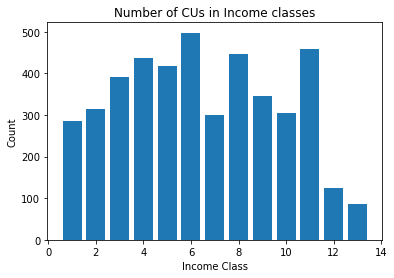

In [19]:
# ploting the number of people in each bracket
print(inclassExpenses.INCLASS.value_counts().values)
plt.bar(list(inclassExpenses.INCLASS.value_counts().index.tolist()), inclassExpenses.INCLASS.value_counts().values, align='center')
plt.title("Number of CUs in Income classes")
plt.xlabel("Income Class")
plt.ylabel("Count")
plt.show()

### Checking the Standard Deviations

What I'm finding is that the higher income brackets (>150k) have high standard deviations for housing.
My thoughts on why this could be
- Non-reporting
- disposable income combined with preference in lifestyle
 - people with higher incomes have the choice if they want to spend more on a house


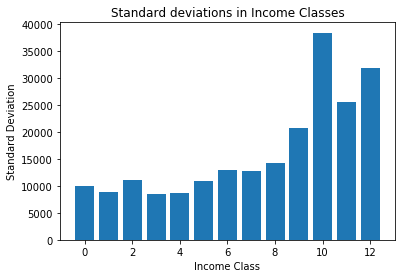

In [20]:
inclassSD = inclassExpenses.groupby(['INCLASS'],as_index=False).std()
inclassSD.iHousing
plt.bar(inclassSD.iHousing.index, inclassSD.iHousing,)
plt.title("Standard deviations in Income Classes")
plt.xlabel("Income Class")
plt.ylabel("Standard Deviation")
plt.show()

### Dataframe of rows with negative values for housing for incomeclasses

In [21]:
inclassExpenses.loc[inclassExpenses.iHousing <= 0]

,NEWID,INCLASS,iTotalExp,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
345,2997872,5,40896.0,7768.0,3272.0,-2572.0,6816.0,0.0,5424.0,5276.0,0.0,140.0,0.0,0.0,14772.0,0.0
971,2997873,3,13388.0,7780.0,3512.0,-12980.0,6916.0,400.0,3800.0,3600.0,0.0,360.0,0.0,0.0,0.0,0.0
2590,2997875,5,17228.0,8156.0,3532.0,-10180.0,6148.0,0.0,4532.0,3600.0,120.0,1320.0,0.0,0.0,0.0,0.0


### Getting Description of the inclassExpenses dataframe

In [22]:
# max and min of housing per income class
rowDescription = []
for inclass in range(1,len(incomeBrackets)):
    rowDescription.append(inclassExpenses.iHousing.loc[inclassExpenses.INCLASS == inclass].describe())
descriptions = pd.concat(rowDescription, axis=1)
descriptions.columns = range(0,len(incomeBrackets)-1)
descriptions = descriptions.transpose()
descriptions

,count,mean,std,min,25%,50%,75%,max
0,285.0,8885.719298,9908.802726,190.0,3000.0,6396.0,10870.00,100452.0
1,314.0,7802.646497,8773.711443,30.0,2927.0,5396.0,9550.00,79576.0
2,392.0,9205.979592,11119.163524,-12980.0,3409.0,6792.0,10880.00,100556.0
3,436.0,10321.944954,8396.444117,120.0,4645.0,8938.0,13660.00,69796.0
4,419.0,11029.474940,8603.639679,-10180.0,4398.0,9552.0,15008.00,52912.0
5,498.0,13139.455823,10877.852585,40.0,6131.0,11228.0,17225.00,109400.0
6,300.0,15388.730000,13008.621235,400.0,7107.5,13332.0,20266.00,146416.0
7,448.0,17174.352679,12672.424747,610.0,8773.0,14308.0,21668.25,90984.0
8,346.0,19365.393064,14323.270206,988.0,9038.5,16158.0,25212.00,108044.0
9,304.0,24082.756579,20630.981091,910.0,12263.0,20848.0,30238.50,227912.0


### Testing the removal of outliers in iHousing
 - For each income class
    - Find Q1 and Q3
    - Calculate IQR
    - Find rows outside of Q3/Q2 +/- (1.5 *IQR)
 - Remove Rows from Dataframe

In [23]:
# cleaning the inclassExpenses dataframe of outliers
outliers1 = inclassExpenses.copy()
outliers1
removeRows = []
for inclass in range(1,len(incomeBrackets)):
    outliers1InClass = outliers1.where(outliers1['INCLASS']==inclass)
    Q1 = outliers1InClass['iHousing'].quantile(0.25)
    Q3 = outliers1InClass['iHousing'].quantile(0.75)
    IQR = Q3 - Q1
    removeRows.extend(outliers1InClass[outliers1InClass['iHousing'] < (Q1 - (1.5 * IQR))].index.tolist())
    removeRows.extend(outliers1InClass[outliers1InClass['iHousing'] > (Q3 + (1.5 * IQR))].index.tolist())
clean1 = outliers1.drop(outliers1.index[removeRows])
clean1

# creating the descriptions for the cleaned outlier dataframe
rowDescription1 = []
for inclass in range(1,len(incomeBrackets)):
    rowDescription1.append(clean1.iHousing.loc[clean1.INCLASS == inclass].describe())
descriptions1 = pd.concat(rowDescription1, axis=1)
descriptions1.columns = range(0,len(incomeBrackets)-1)
descriptions1 = descriptions1.transpose()
descriptions1

,count,mean,std,min,25%,50%,75%,max
0,265.0,6905.052830,5086.669753,190.0,2764.0,5980.0,9680.00,21924.0
1,293.0,6086.061433,4482.829522,30.0,2756.0,4920.0,8504.00,19200.0
2,368.0,7248.260870,5014.299226,60.0,3368.0,6482.0,9778.50,21852.0
3,414.0,8971.963768,5782.631732,120.0,4477.0,8330.0,12628.00,26736.0
4,406.0,10114.448276,6950.864899,-10180.0,4269.0,9222.0,14446.00,29336.0
5,482.0,11800.506224,7174.029307,40.0,5889.0,11078.0,16580.00,33184.0
6,291.0,13927.969072,8609.335116,400.0,6796.0,13112.0,19004.00,39896.0
7,425.0,15108.985882,8644.506513,610.0,8652.0,13976.0,20244.00,39932.0
8,336.0,17818.973214,10865.234442,988.0,8872.5,15868.0,24323.00,48516.0
9,292.0,21092.797945,11406.337230,910.0,12092.0,20370.0,28185.00,56912.0


### Plotting the Standard deviations for the No outlier dataframe

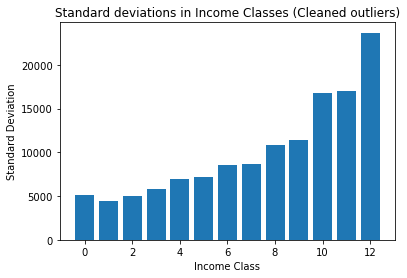

In [24]:
inclassClean1SD = clean1.groupby(['INCLASS'],as_index=False).std()
inclassClean1SD.iHousing
plt.bar(inclassClean1SD.iHousing.index, inclassClean1SD.iHousing,)
plt.title("Standard deviations in Income Classes (Cleaned outliers)")
plt.xlabel("Income Class")
plt.ylabel("Standard Deviation")
plt.show()

### Things learned from removing outliers
- Removing outliers helped some of the standard deviation crazyness
- Higher incomebrackets have greater standard deviation even without outliers

### Creating the percentage output for cleaned dataframe

In [25]:
# creating percentage outputs for cleaned dataframe
inclassCleanAverages = round(clean1.ix[: ,clean1.columns != 'NEWID'].groupby(['INCLASS'],as_index=False).mean(),2)

# creating new dataframe for the percentages that only includes the plynty categories
cleanPercentages = inclassCleanAverages.loc[:,rollupNames[1:]]
for column in rollupNames[1:]:
    cleanPercentages[column] = inclassCleanAverages[column]/inclassCleanAverages.iTotalExp
cleanPercentages

,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
0,0.143153,0.069182,0.256804,0.110264,0.024893,0.187239,0.100931,0.049310,0.021146,0.054009,0.002750,0.001006,0.020686
1,0.153483,0.062595,0.267757,0.125779,0.027027,0.164728,0.092728,0.053621,0.019365,0.030868,0.004515,0.013085,0.015551
2,0.148606,0.062147,0.236694,0.109940,0.023583,0.198583,0.115255,0.061817,0.028709,0.025866,0.004742,0.005466,0.021406
3,0.134865,0.064804,0.260607,0.098345,0.028434,0.175389,0.112610,0.066170,0.029496,0.045737,0.005712,0.003071,0.025240
4,0.128674,0.064546,0.254878,0.099356,0.026990,0.218615,0.106389,0.058407,0.018433,0.040300,0.006487,0.006102,0.029177
5,0.120934,0.061817,0.269803,0.097682,0.031396,0.193738,0.123868,0.052955,0.025261,0.039144,0.007060,0.018490,0.042149
6,0.122026,0.060859,0.280476,0.089600,0.030806,0.202858,0.128762,0.058220,0.014002,0.031426,0.009598,0.011716,0.040348
7,0.111910,0.062346,0.278634,0.088775,0.028617,0.216512,0.109742,0.064538,0.016230,0.048517,0.010194,0.011668,0.047683
8,0.110234,0.067775,0.297634,0.087854,0.031368,0.203069,0.109221,0.065089,0.018653,0.043860,0.010755,0.015197,0.060710
9,0.103833,0.068246,0.314355,0.082093,0.033907,0.195876,0.096032,0.066415,0.016211,0.050051,0.007422,0.026456,0.060896


### Cell that determines how similar the neighbor rows are
Potentially use this to combine similar rows.
Can't figure out the correct statistical test to determine if rows are statistically similar

In [26]:
significance = 0.01
for row in range(len(cleanPercentages)-1):
    print("Income Bracket Range 1: $"+str(incomeBrackets[row])+" - "+"$"+str(incomeBrackets[row+1]))
    print("Income Bracket Range 2: $"+str(incomeBrackets[row+1])+" - "+"$"+str(incomeBrackets[row+2]))
    print("Number of CUs in Income Bracket 1: "+str(inclassExpenses.INCLASS.value_counts().values[row]))
    print("Number of CUs in Income Bracket 2: "+str(inclassExpenses.INCLASS.value_counts().values[row+1]))
    print("Rows in Percentage Dataframe: Row "+str(row)+" and Row "+str(row+1))
    similarity = 0
    for column in range(len(cleanPercentages.columns)):
        similarity += (cleanPercentages.loc[column].mean() * abs(cleanPercentages.ix[row,column] - cleanPercentages.ix[row+1,column]))
        if abs(cleanPercentages.ix[row,column] - cleanPercentages.ix[row+1,column]) < significance:
            print("Column: "+str(cleanPercentages.columns[column]))
    print("The similarity value is: "+str(round(similarity*1000,2)))
    print()

Income Bracket Range 1: $-inf - $11000
Income Bracket Range 2: $11000 - $20000
Number of CUs in Income Bracket 1: 498
Number of CUs in Income Bracket 2: 460
Rows in Percentage Dataframe: Row 0 and Row 1
Column: iFoodAway
Column: iClothingAndBeauty
Column: iHealthcare
Column: iEntertainment
Column: iMiscellaneous
Column: iInsurance
Column: iHousingPrinciple
The similarity value is: 10.32

Income Bracket Range 1: $11000 - $20000
Income Bracket Range 2: $20000 - $30000
Number of CUs in Income Bracket 1: 460
Number of CUs in Income Bracket 2: 448
Rows in Percentage Dataframe: Row 1 and Row 2
Column: iFoodAtHome
Column: iFoodAway
Column: iClothingAndBeauty
Column: iEntertainment
Column: iMiscellaneous
Column: iCharitableAndFamilyGiving
Column: iInsurance
Column: iEducation
Column: iHousingPrinciple
The similarity value is: 12.25

Income Bracket Range 1: $20000 - $30000
Income Bracket Range 2: $30000 - $43000
Number of CUs in Income Bracket 1: 448
Number of CUs in Income Bracket 2: 436
Rows 